## Section 1: Data Loading & Cleaning

In [71]:
!pip install kaggle


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
pip install kaggle python-dotenv

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Retrieve Kaggle credentials from environment variables
kaggle_username = os.getenv("USER_NAME")
kaggle_key = os.getenv("KAGGLE_KEY")

# Checking if the credentials were loaded
if not kaggle_username or not kaggle_key:
    raise ValueError("Kaggle credentials not loaded correctly")

print("Kaggle credentials loaded successfully")

Kaggle credentials loaded successfully


In [74]:
!kaggle datasets download -d rakeshkapilavai/extrovert-vs-introvert-behavior-data

Dataset URL: https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data
License(s): CC-BY-SA-4.0
extrovert-vs-introvert-behavior-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [76]:
import zipfile

# Path to the ZIP file
zip_file_path = 'extrovert-vs-introvert-behavior-data.zip'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('extrovert-vs-introvert-behavior-data')

# Check the extracted contents
import os
print(os.listdir('extrovert-vs-introvert-behavior-data'))

['personality_datasert.csv', 'personality_dataset.csv']


In [77]:
# 1. Load the dataset using pandas.
data = pd.read_csv('personality_dataset.csv')

In [78]:
data.shape

(2900, 8)

In [79]:
data_personality=pd.DataFrame(data)

In [80]:
# 2.Display the first 10 rows and list all column names.
data_personality.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


In [81]:
data_personality.columns.tolist()

['Time_spent_Alone',
 'Stage_fear',
 'Social_event_attendance',
 'Going_outside',
 'Drained_after_socializing',
 'Friends_circle_size',
 'Post_frequency',
 'Personality']

In [82]:
# 3. Check for missing values per column.
data_personality.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [83]:
# 4. Impute missing numerical values with the mean, and categorical with mode.
for column in data_personality.columns:
    if data_personality[column].dtype == 'object':  # Categorical column
        data_personality[column].fillna(data_personality[column].mode()[0], inplace=True)
    else:  # Numerical column
        data_personality[column].fillna(data_personality[column].mean(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17400\224518212.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_personality[column].fillna(data_personality[column].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_17400\224518212.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [84]:
# 5. Convert categorical columns like gender to proper data types.
encoder=LabelEncoder()
categorical_cols=data_personality.select_dtypes(include='object')
for column in categorical_cols:
    data_personality[column] = encoder.fit_transform(data_personality[column])

In [85]:
categorical_cols.head()

,Stage_fear,Drained_after_socializing,Personality
0,No,No,Extrovert
1,Yes,Yes,Introvert
2,Yes,Yes,Introvert
3,No,No,Extrovert
4,No,No,Extrovert


In [86]:
data_personality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   int64  
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   int64  
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 181.4 KB


In [87]:
data_personality.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [88]:
# 5. check the data types after conversion
data_personality.dtypes

Time_spent_Alone             float64
Stage_fear                     int64
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing      int64
Friends_circle_size          float64
Post_frequency               float64
Personality                    int64
dtype: object

In [89]:
# 6. Identify and drop duplicate rows.
data_personality.drop_duplicates(inplace=True)

In [90]:
data_personality.shape

(2498, 8)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Time_spent_Alone'),
  Text(1, 0, 'Stage_fear'),
  Text(2, 0, 'Social_event_attendance'),
  Text(3, 0, 'Going_outside'),
  Text(4, 0, 'Drained_after_socializing'),
  Text(5, 0, 'Friends_circle_size'),
  Text(6, 0, 'Post_frequency'),
  Text(7, 0, 'Personality')])

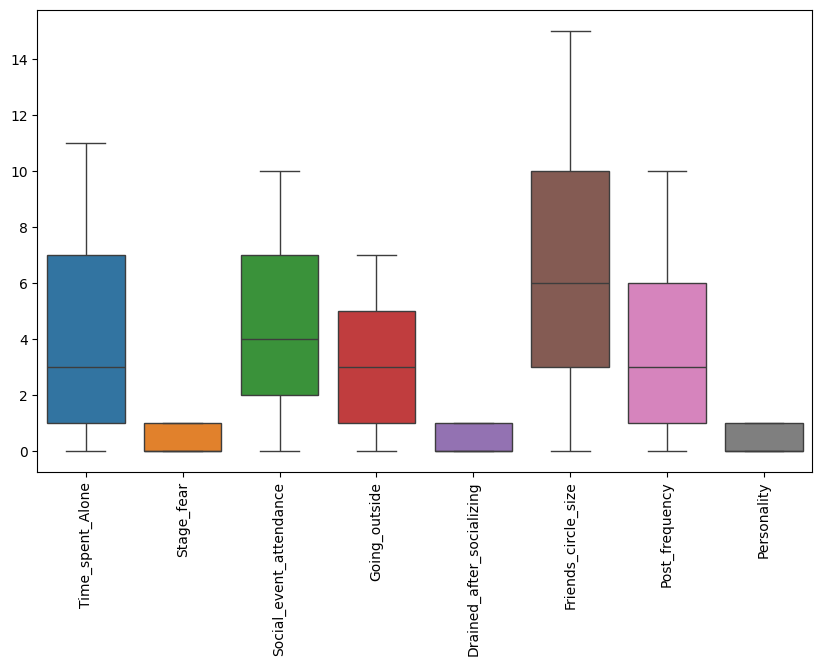

In [91]:
# 7. Use boxplots to find outliers in any numerical column.
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_personality.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)

In [92]:
# 8. Remove rows beyond 3 standard deviations from the mean.
for column in data_personality.select_dtypes(include=['float64', 'int64']).columns:
    mean = data_personality[column].mean()
    std_dev = data_personality[column].std()
    threshold = 3 * std_dev
    data_personality = data_personality[(data_personality[column] >= mean - threshold) & 
                                        (data_personality[column] <= mean + threshold)]

In [93]:
data_personality.shape

(2498, 8)

In [94]:
# 9. Reset index after data cleaning.
data_personality.reset_index(drop=True, inplace=True)

## Section 2: Exploratory Data Analysis (EDA) & Visualizations

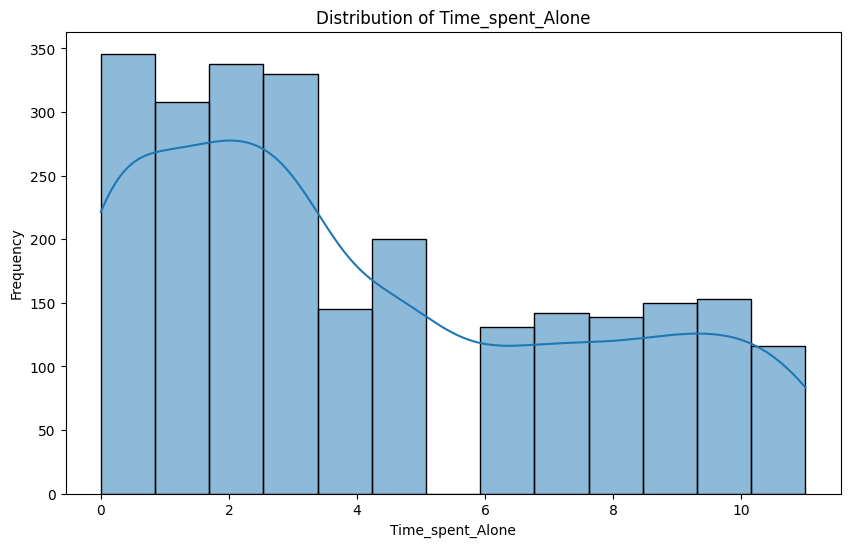

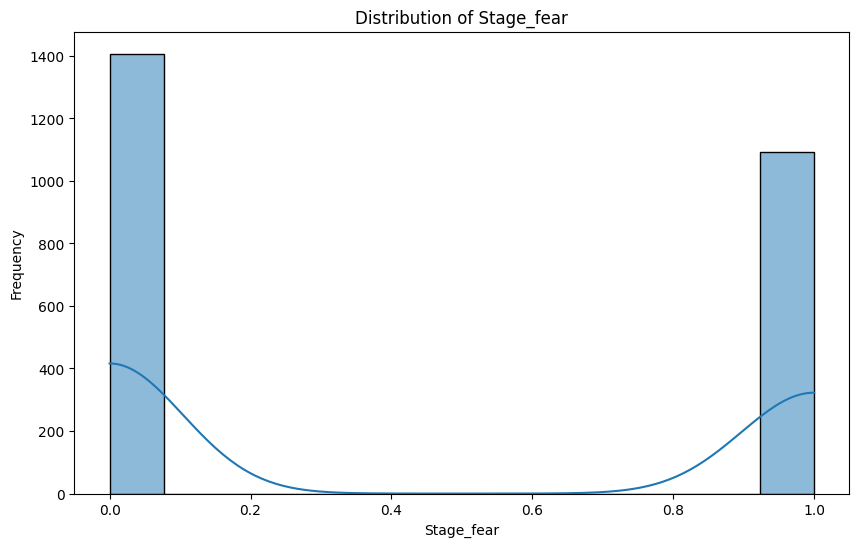

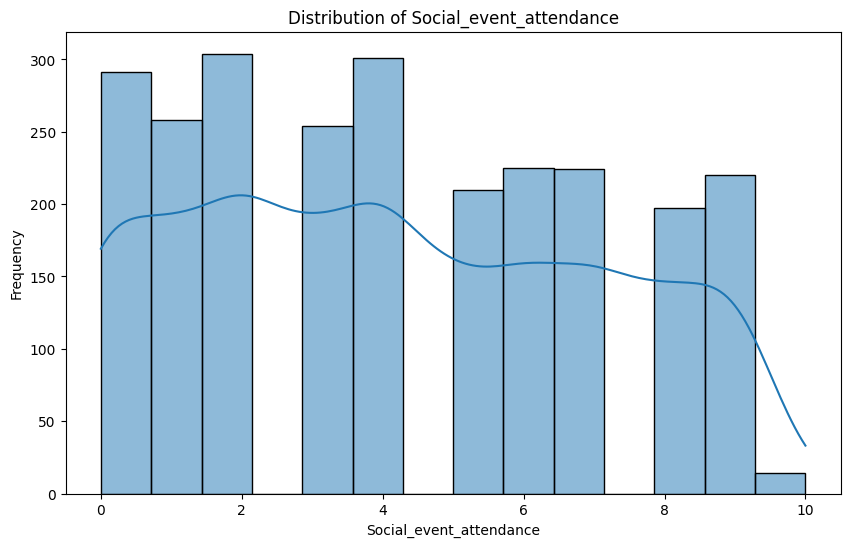

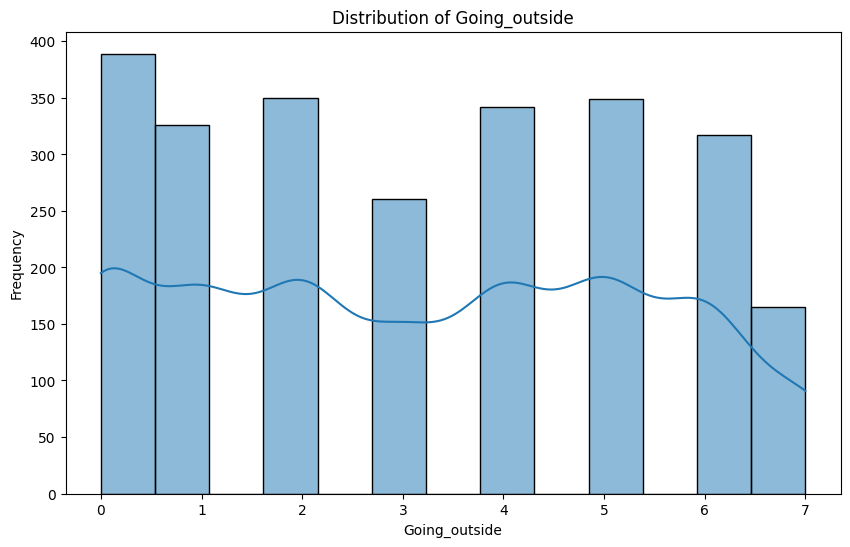

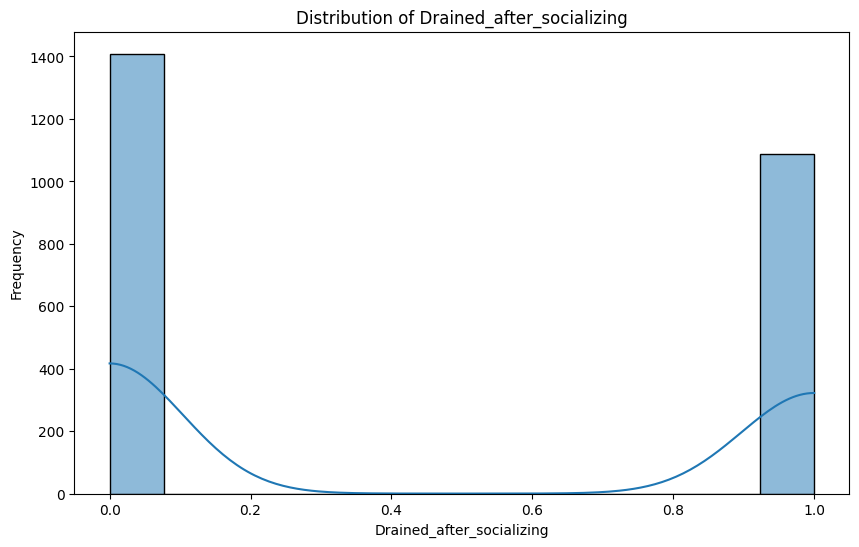

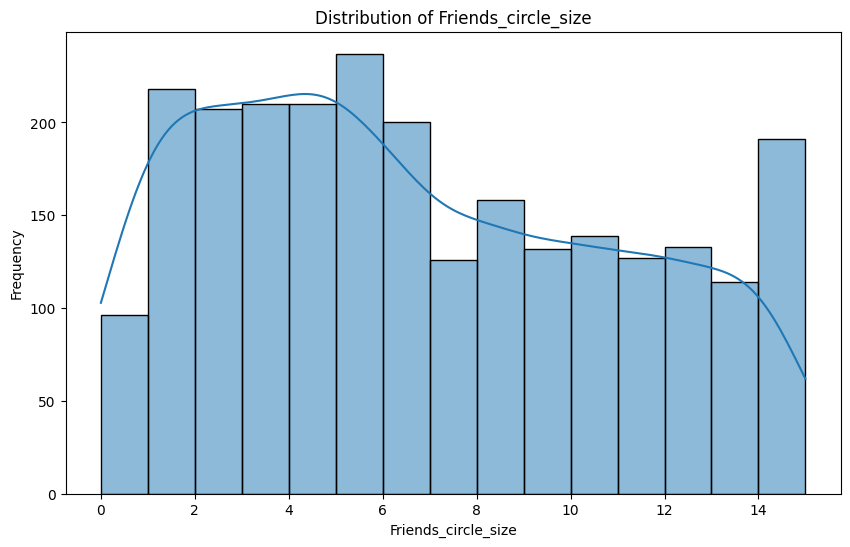

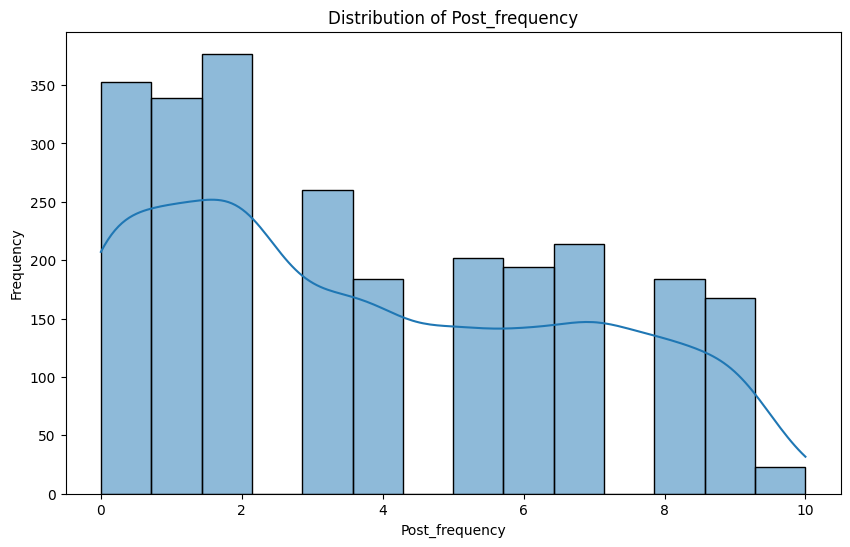

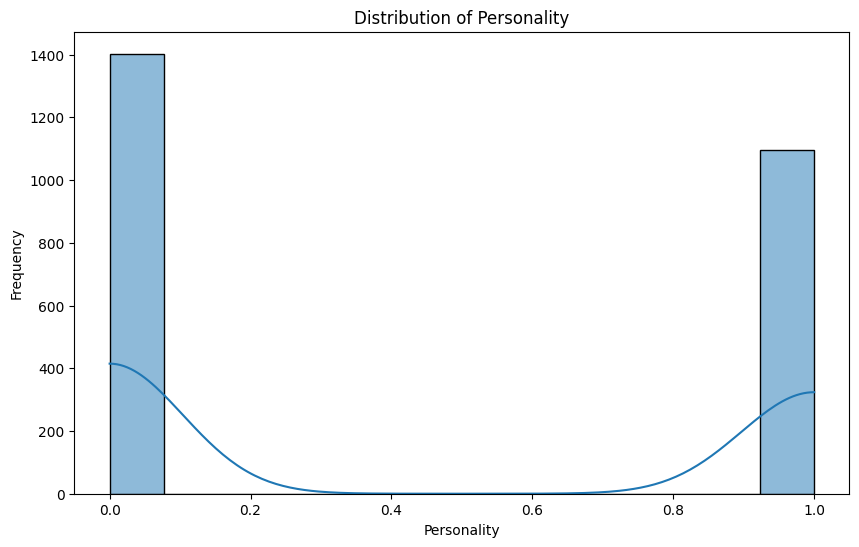

In [95]:
# 10 Plot the distribution (histogram) of each numerical feature.
for column in data_personality.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data_personality[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Text(0.5, 1.0, 'Count of Each Personality Type')

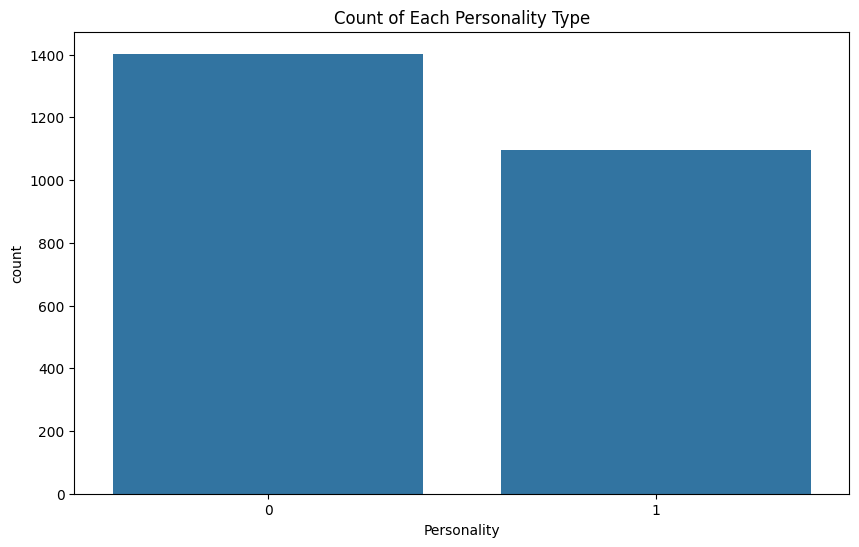

In [96]:
# Create a bar chart showing count per personality type.
plt.figure(figsize=(10, 6))
sns.countplot(data=data_personality, x='Personality', order=data_personality['Personality'].value_counts().index)
plt.title('Count of Each Personality Type')

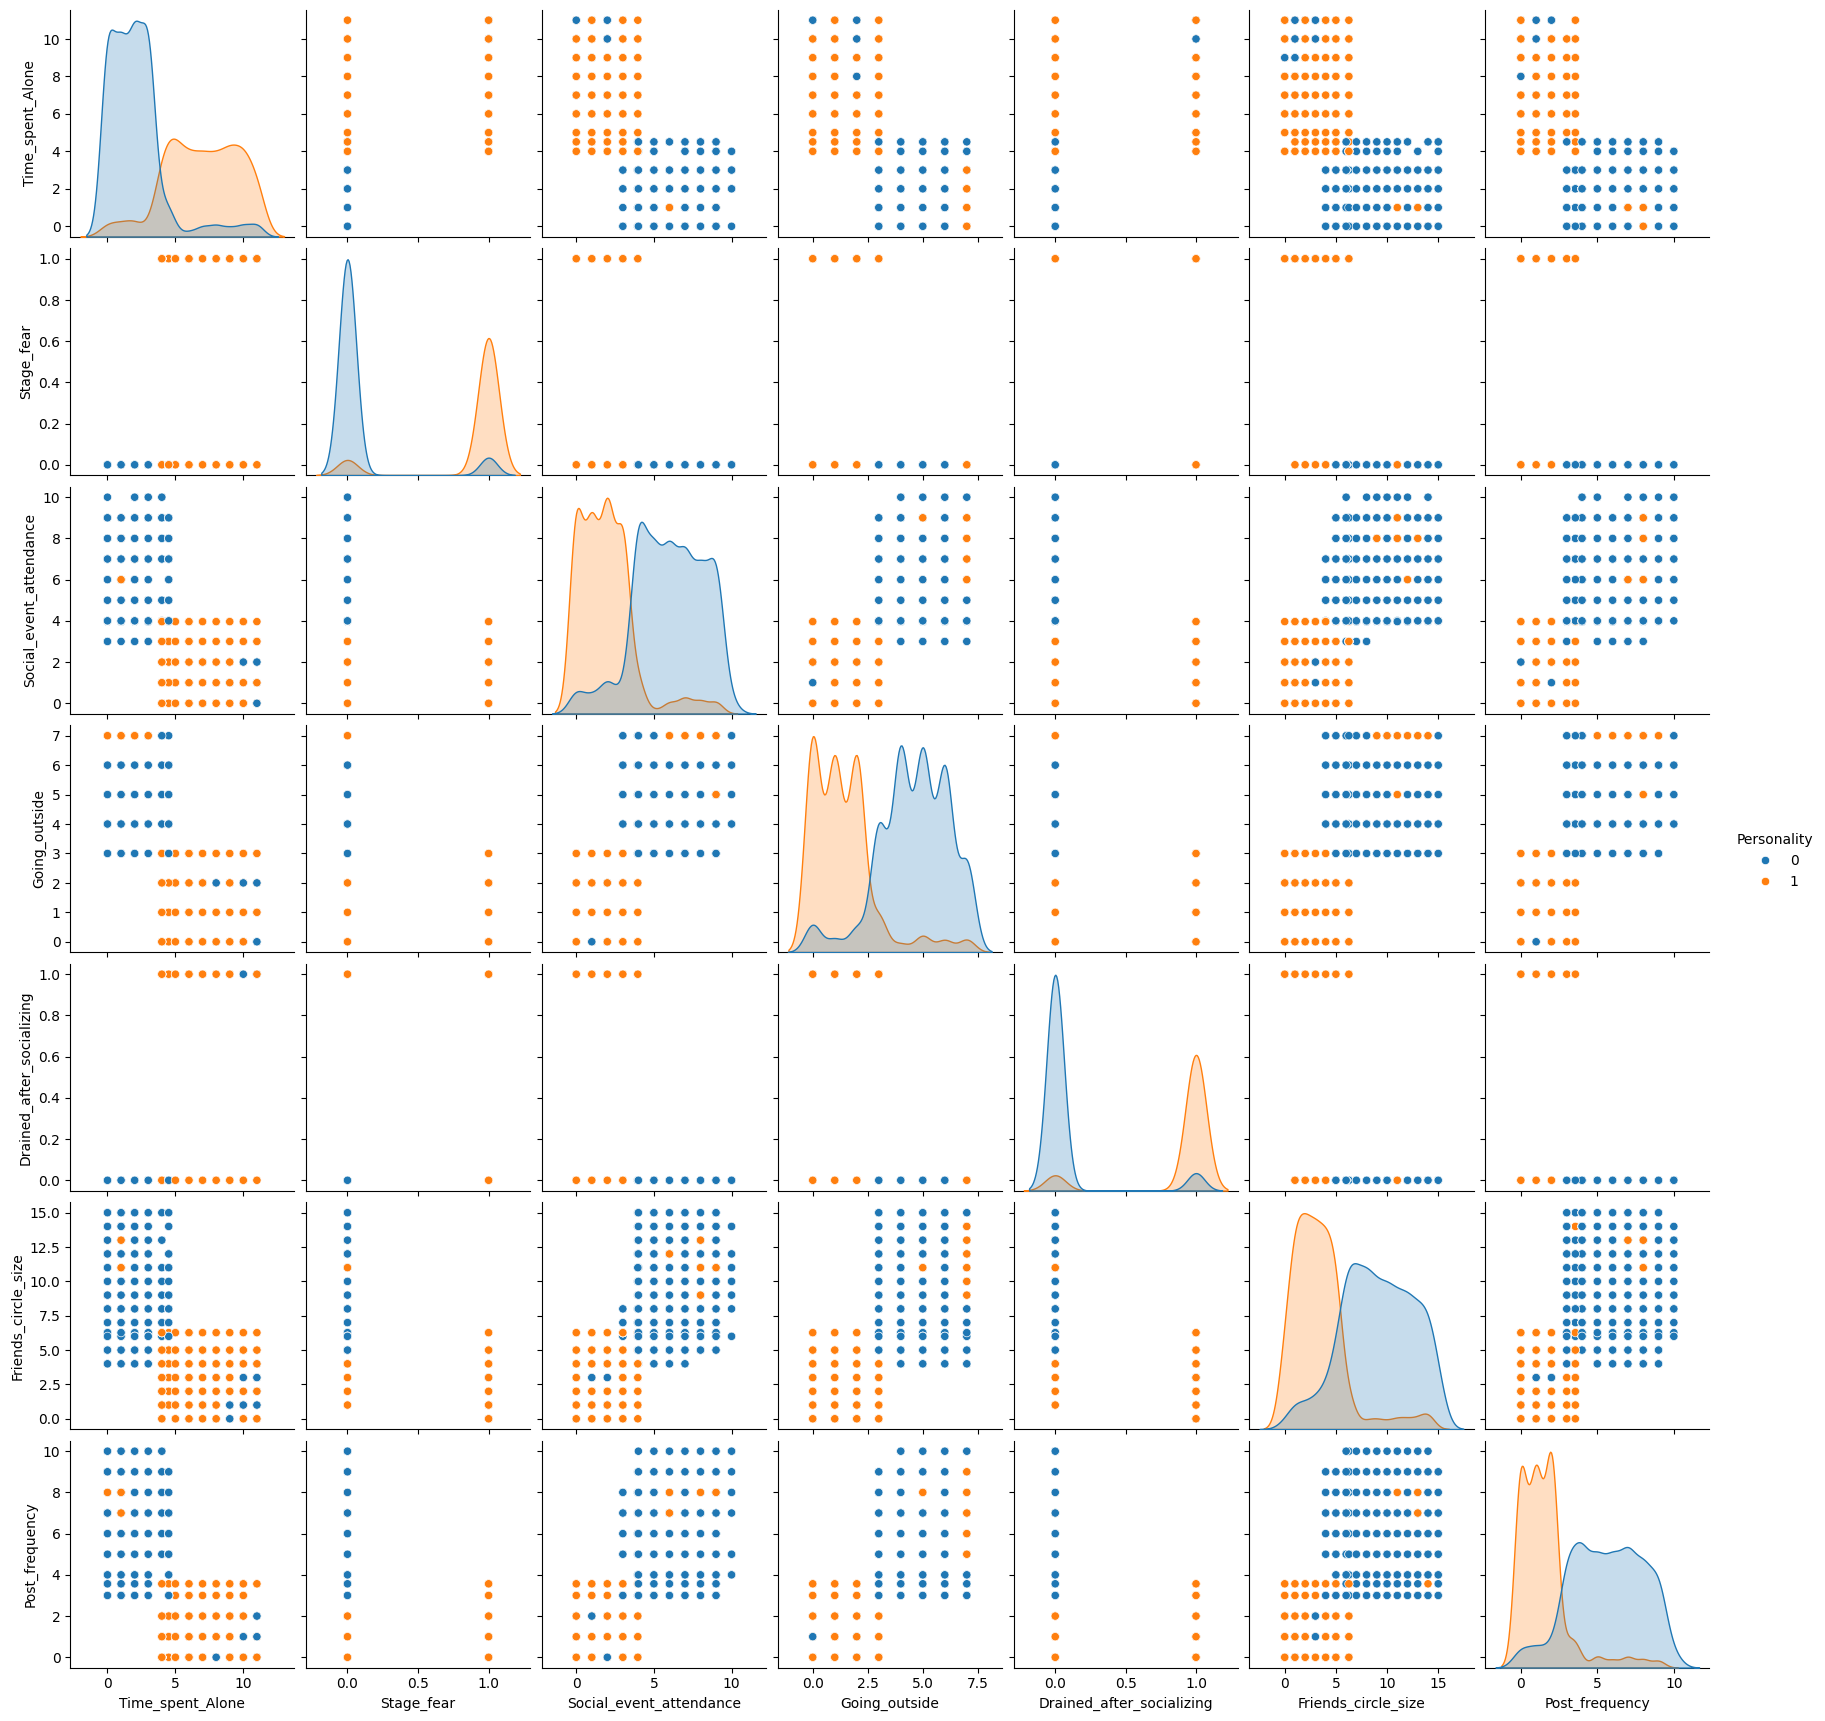

In [97]:
# Use sns.pairplot() to visualize feature relationships by personality.
sns.pairplot(data_personality, hue='Personality')

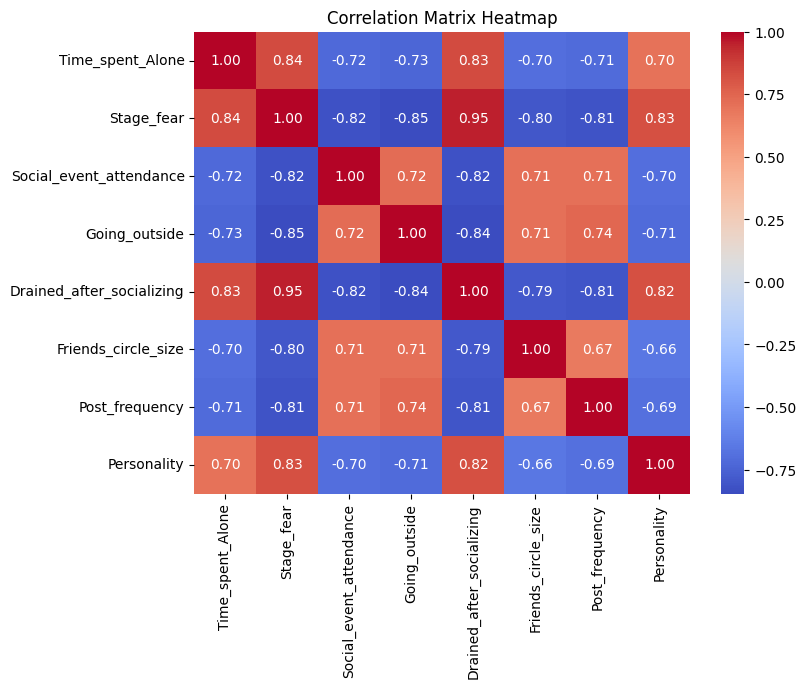

In [98]:
# Generate correlation matrix for numerical columns only
corr_matrix = data_personality.select_dtypes(include=['float64', 'int64']).corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

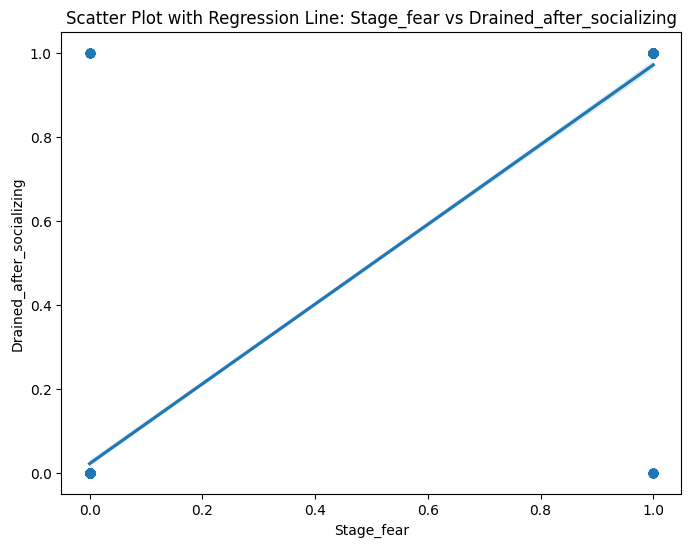

In [99]:
# Create a scatter plot for the two most correlated features with regression line.
corr_matrix_no_diag = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))
max_corr = corr_matrix_no_diag.abs().unstack().sort_values(ascending=False).dropna().index[0]
feature_x, feature_y = max_corr

plt.figure(figsize=(8, 6))
sns.regplot(data=data_personality, x=feature_x, y=feature_y, scatter_kws={'alpha':0.5})
plt.title(f'Scatter Plot with Regression Line: {feature_x} vs {feature_y}')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.show()

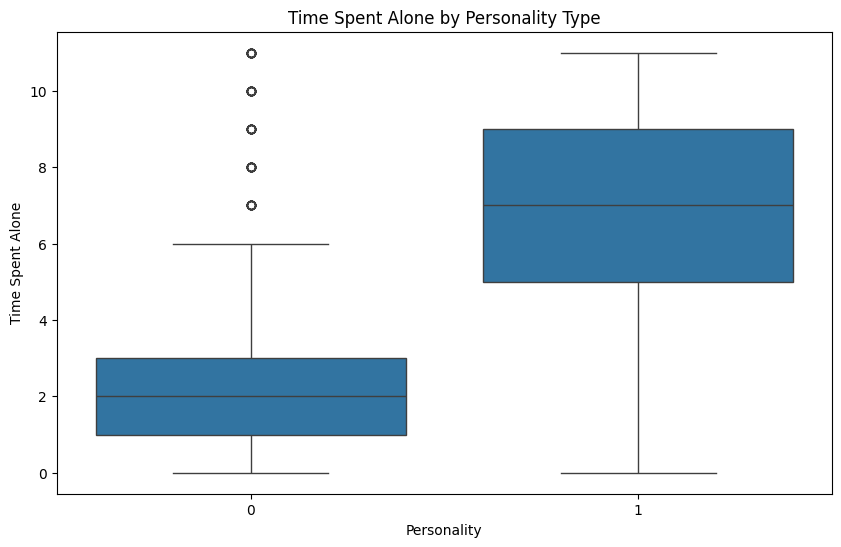

In [100]:
# Plot boxplots of "Time_spent_Alone" grouped by personality.
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_personality, x='Personality', y='Time_spent_Alone')
plt.title('Time Spent Alone by Personality Type')
plt.xlabel('Personality')
plt.ylabel('Time Spent Alone')
plt.show()

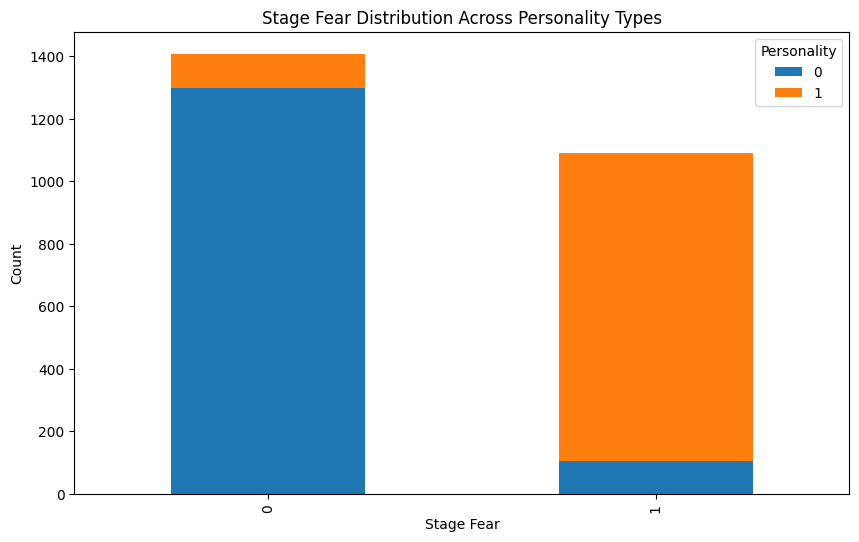

In [101]:
# Show Stage_fear distribution across personality types via a stacked bar chart.
stagefear_personality_ct = pd.crosstab(data_personality['Stage_fear'], data_personality['Personality'])

# Plot stacked bar chart
stagefear_personality_ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stage Fear Distribution Across Personality Types')
plt.xlabel('Stage Fear')
plt.ylabel('Count')
plt.legend(title='Personality')
plt.show()

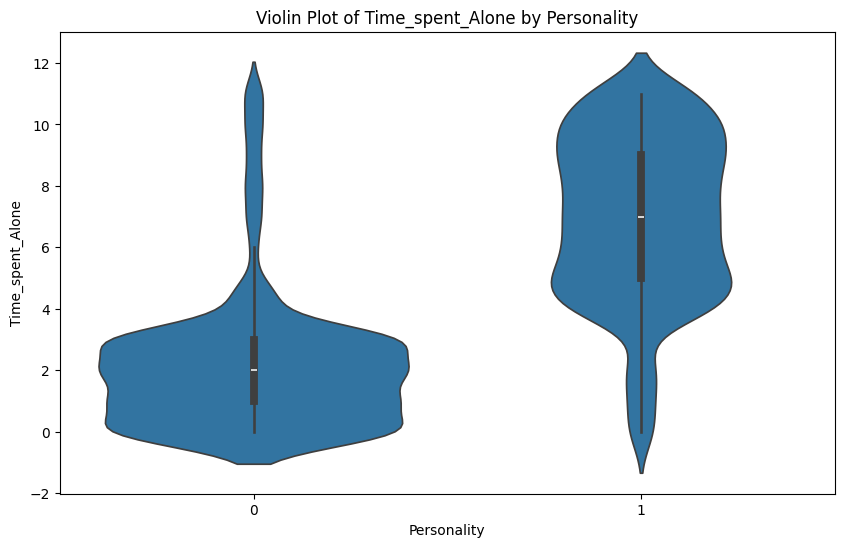

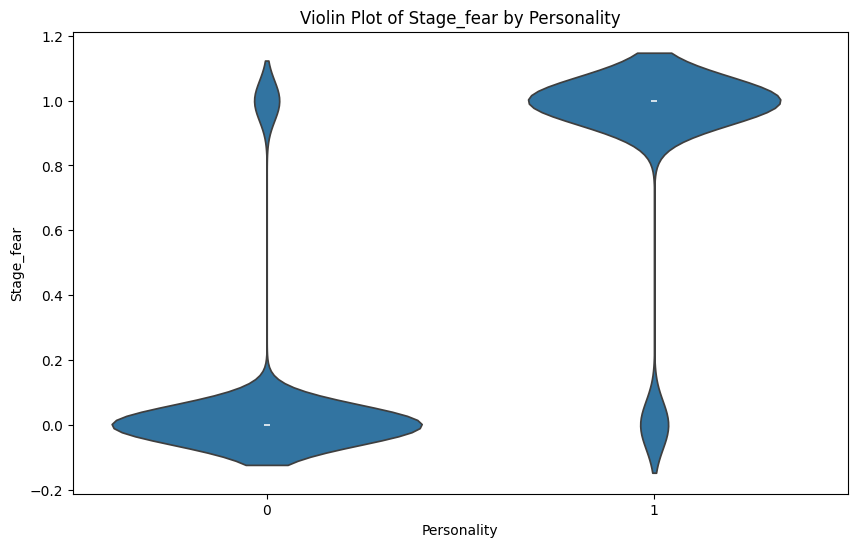

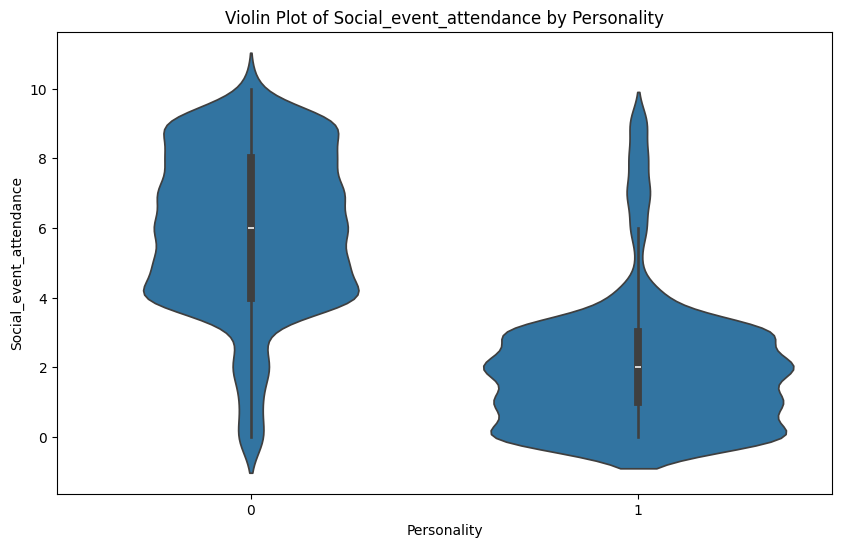

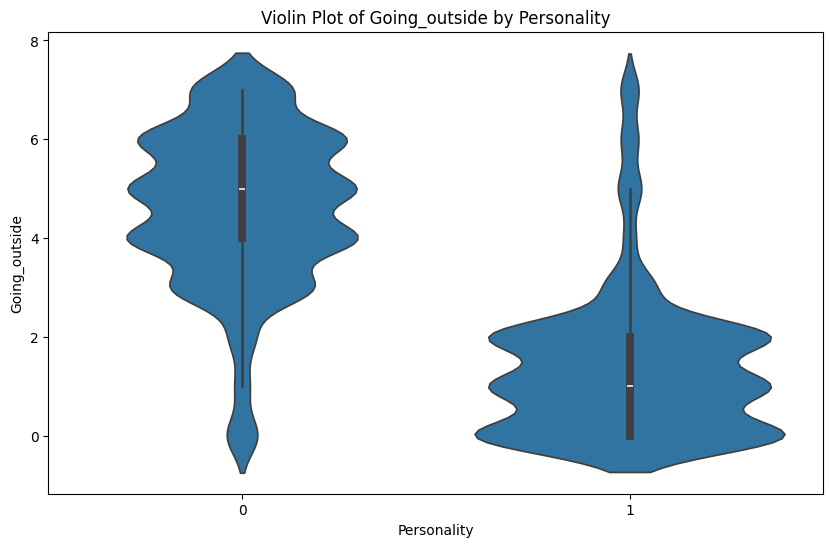

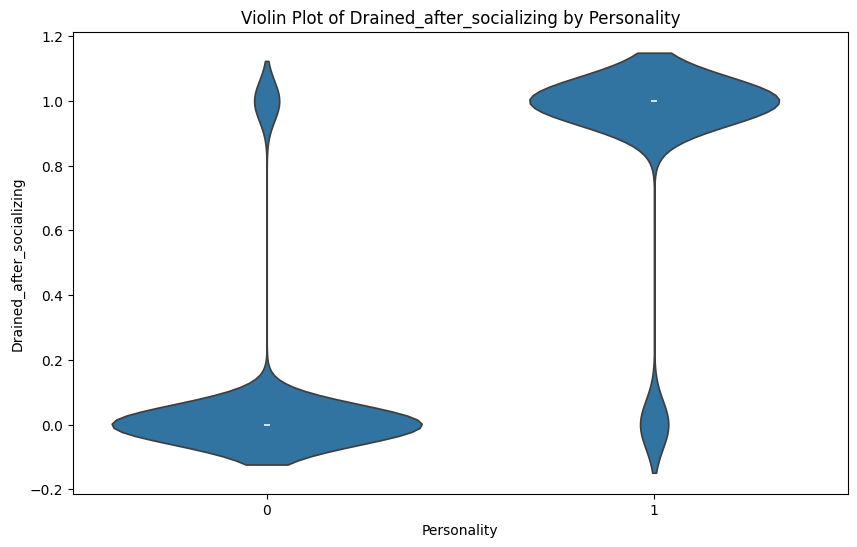

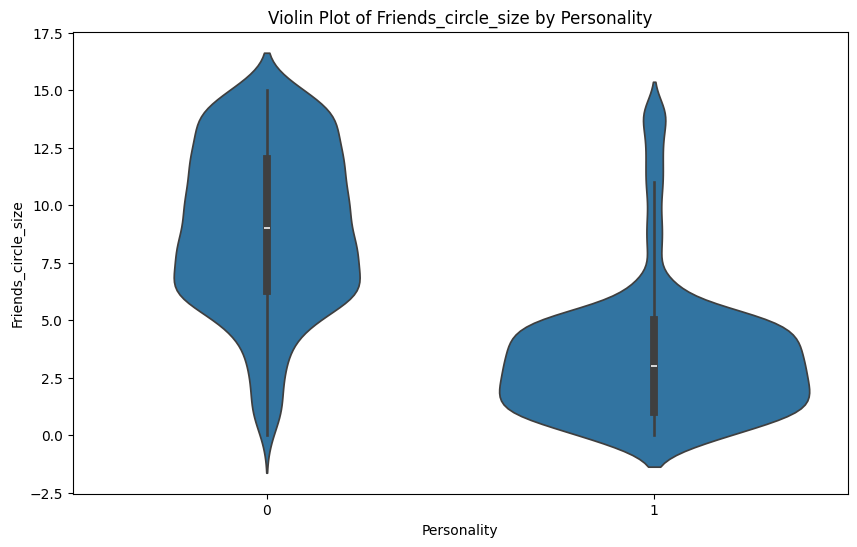

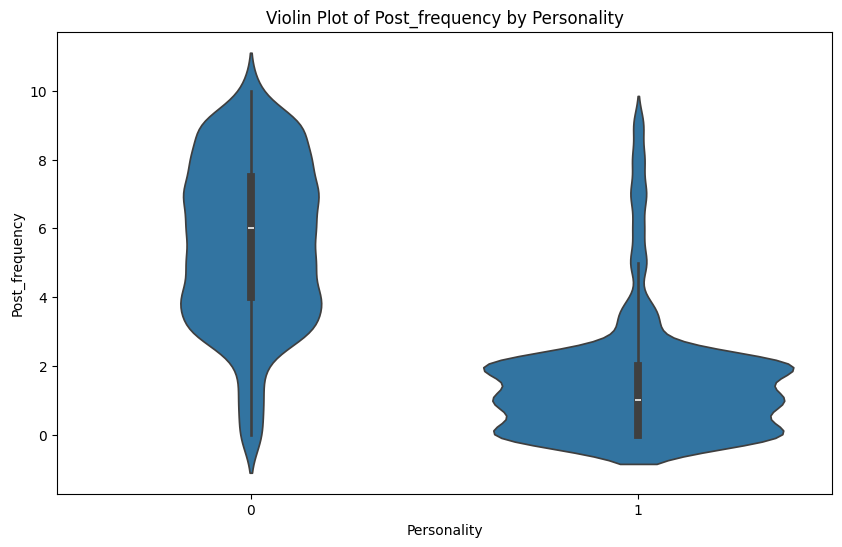

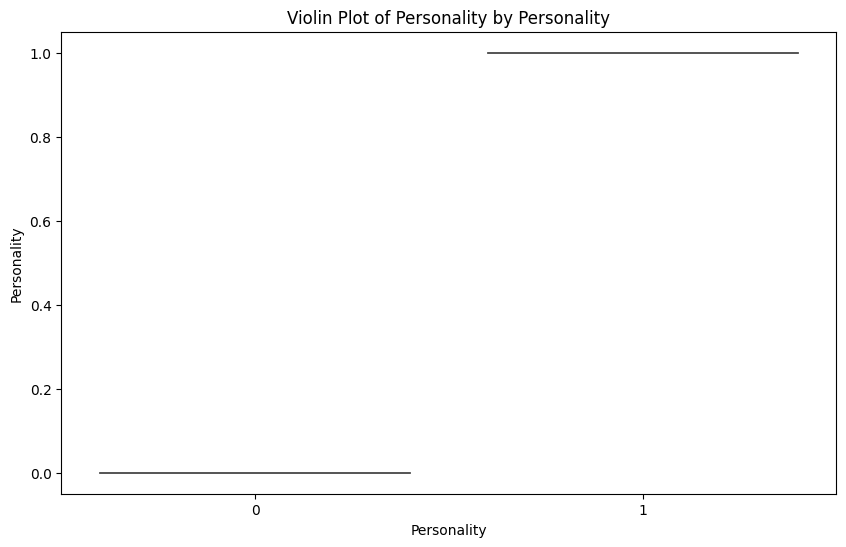

In [102]:
# Use violin plots to show distribution of features by class.
num_features = data_personality.select_dtypes(include=['float64', 'int64']).columns # Violin plots for each numerical feature grouped by Personality

for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data_personality, x='Personality', y=feature)
    plt.title(f'Violin Plot of {feature} by Personality')
    plt.xlabel('Personality')
    plt.ylabel(feature)
    plt.show()

In [103]:
# Compute mean, median, and std per class using groupby.
stats_per_class = data_personality.groupby('Personality')[num_features].agg(['mean', 'median', 'std'])
print(stats_per_class)

            Time_spent_Alone                  Stage_fear                   \
                        mean median       std       mean median       std   
Personality                                                                 
0                   2.129863    2.0  2.212471   0.074840    0.0  0.263226   
1                   6.925714    7.0  2.699096   0.900457    1.0  0.299527   

            Social_event_attendance                  Going_outside  ...  \
                               mean median       std          mean  ...   
Personality                                                         ...   
0                          5.972184    6.0  2.211540      4.592302  ...   
1                          1.931316    2.0  1.846495      1.400000  ...   

            Drained_after_socializing Friends_circle_size                   \
                                  std                mean median       std   
Personality                                                                  
0   

## Section 3: GroupBy & Aggregation

In [104]:
# Group by personality and compute the mean of all numeric features.
mean_by_personality = data_personality.groupby('Personality')[num_features].mean()
print(mean_by_personality)

             Time_spent_Alone  Stage_fear  Social_event_attendance  \
Personality                                                          
0                    2.129863    0.074840                 5.972184   
1                    6.925714    0.900457                 1.931316   

             Going_outside  Drained_after_socializing  Friends_circle_size  \
Personality                                                                  
0                 4.592302                    0.07484             9.070388   
1                 1.400000                    0.89863             3.389416   

             Post_frequency  Personality  
Personality                               
0                  5.602332          0.0  
1                  1.525577          1.0  


In [105]:
#  Group by gender and personality to get average social_media_usage.
# Since there is no 'Gender' column, you may want to use another categorical variable, such as 'Stage_fear'.
# Assuming 'Post_frequency' is the social media usage metric.

avg_social_media_usage = data_personality.groupby(['Stage_fear', 'Personality'])['Post_frequency'].mean()
print(avg_social_media_usage)

Stage_fear  Personality
0           0              5.973861
            1              4.986832
1           0              1.009524
            1              1.142943
Name: Post_frequency, dtype: float64


In [106]:
# Identify top 3 features with the largest difference in means between classes.
# 1 .Calculate mean per personality for each numeric feature
mean_per_class = data_personality.groupby('Personality')[num_features].mean() 

# 2. Compute the max difference in means for each feature across classes
mean_diff = mean_per_class.max() - mean_per_class.min()

# 3. Get the top 3 features with the largest mean difference
top3_features = mean_diff.abs().sort_values(ascending=False).head(3)
print("Top 3 features with largest mean difference between classes:")
print(top3_features)

Top 3 features with largest mean difference between classes:
Friends_circle_size    5.680972
Time_spent_Alone       4.795851
Post_frequency         4.076755
dtype: float64


In [107]:
diff = mean_per_class.loc[0] - mean_per_class.loc[1]
diff = diff.abs() 
top_3 = diff.sort_values(ascending = False).head(3)
print(top_3)

Friends_circle_size    5.680972
Time_spent_Alone       4.795851
Post_frequency         4.076755
dtype: float64


In [108]:
# Find personality + another categorical combo with highest average of any feature.
# Since 'Gender' does not exist, let's use 'Stage_fear' and 'Personality'
grouped = data_personality.groupby(['Stage_fear', 'Personality'])[num_features].mean()
max_value = grouped.max().max()
max_feature = grouped.max().idxmax()
max_combo = grouped.stack().idxmax()

print(f"Highest average value: {max_value}")
print(f"Feature: {max_feature}")
print(f"Stage_fear + Personality combo: {max_combo}")

Highest average value: 9.620766191426686
Feature: Friends_circle_size
Stage_fear + Personality combo: (np.int64(0), np.int64(0), 'Friends_circle_size')


In [109]:
# Save aggregated results as a CSV.
avg_social_media_usage.to_csv('avg_social_media_usage.csv')

PermissionError: [Errno 13] Permission denied: 'avg_social_media_usage.csv'

## Section 4: Feature Scaling

In [ ]:
# Separate features (X) and target (y)
X = data_personality.drop('Personality', axis=1)
y = data_personality['Personality']

In [ ]:
from sklearn.model_selection import train_test_split
# Split into training and test sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to X: fit on train, transform both.
# Select only numerical columns for scaling
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Use MinMaxScaler, compare the scaled feature ranges.
# Apply MinMaxScaler to numerical columns
minmax_scaler = MinMaxScaler()
X_train_minmax = X_train.copy()
X_test_minmax = X_test.copy()

X_train_minmax[num_cols] = minmax_scaler.fit_transform(X_train[num_cols])
X_test_minmax[num_cols] = minmax_scaler.transform(X_test[num_cols])

# Compare feature ranges after scaling
print("StandardScaler ranges (train):")
print(X_train_scaled[num_cols].agg(['min', 'max']))

print("\nMinMaxScaler ranges (train):")
print(X_train_minmax[num_cols].agg(['min', 'max']))

In [ ]:
# Plot a histogram of a scaled feature before and after scaling.
feature = 'Post_frequency'

plt.figure(figsize=(12, 5))

# Before scaling
plt.subplot(1, 2, 1)
plt.hist(X_test[feature], bins=30, color='skyblue', edgecolor='black')
plt.title(f'Histogram of {feature} (Before Scaling)')
plt.xlabel(feature)
plt.ylabel('Count')

# After MinMax scaling
plt.subplot(1, 2, 2)
plt.hist(X_test_minmax[feature], bins=30, color='salmon', edgecolor='black')
plt.title(f'Histogram of {feature} (After MinMax Scaling)')
plt.xlabel(f'{feature} (Scaled)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Section 5: Train/Test Split & Baseline Model

In [ ]:
# Ensure test set is scaled correctly and has no missing values.
# Check for missing values in the scaled test set
missing_values = X_test_scaled.isnull().sum()
print("Missing values in X_test_scaled:\n", missing_values)

# Confirm all numerical columns are within expected range (for StandardScaler: mean~0, std~1)
print("\nScaled test set stats (mean, std):")
print(X_test_scaled[num_cols].agg(['mean', 'std']))

# If any missing values exist, impute with 0 (mean of StandardScaler)
if missing_values.any():
    X_test_scaled[num_cols] = X_test_scaled[num_cols].fillna(0)

In [ ]:
# Train a Logistic Regression classifier.

from sklearn.linear_model import LogisticRegression
# One-hot encode categorical features for logistic regression
X_train_enc = pd.get_dummies(X_train_scaled, drop_first=True)
X_test_enc = pd.get_dummies(X_test_scaled, drop_first=True)

# Align columns in case of any mismatch after encoding
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

# Train logistic regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_enc, y_train)

# Predict on test set
y_pred = logreg.predict(X_test_enc)

In [ ]:
# Evaluate: accuracy, precision, recall, F1-score.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

In [ ]:
# Plot the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Explain any signs of class imbalance or bias
# Check class distribution in the full dataset and test set
print("Class distribution in the full dataset:")
print(data_personality['Personality'].value_counts())

print("\nClass distribution in the test set:")
print(y_test.value_counts())

# Calculate class proportions
full_props = data_personality['Personality'].value_counts(normalize=True)
test_props = y_test.value_counts(normalize=True)

print("\nClass proportions in the full dataset:")
print(full_props)
print("\nClass proportions in the test set:")
print(test_props)

# Brief explanation
if (full_props.max() - full_props.min()) > 0.2:
    print("\nThere is a noticeable class imbalance in the dataset, with one personality type being much more frequent than the other. This could introduce bias in model predictions, favoring the majority class.")
else:
    print("\nThe class distribution is relatively balanced, so there is minimal risk of bias due to class imbalance.")

## Section 6: Alternative Classification Models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train a Decision Tree classifier and evaluate
# Train Decision Tree on one-hot encoded, scaled data
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_enc, y_train)

# Predict on test set
y_pred_tree = dtree.predict(X_test_enc)

# Evaluate
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted', zero_division=0)
recall_tree = recall_score(y_test, y_pred_tree, average='weighted', zero_division=0)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted', zero_division=0)

print(f"Decision Tree Accuracy: {accuracy_tree:.4f}")
print(f"Decision Tree Precision (weighted): {precision_tree:.4f}")
print(f"Decision Tree Recall (weighted): {recall_tree:.4f}")
print(f"Decision Tree F1-score (weighted): {f1_tree:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree, zero_division=0))

Decision Tree Accuracy: 0.8480
Decision Tree Precision (weighted): 0.8478
Decision Tree Recall (weighted): 0.8480
Decision Tree F1-score (weighted): 0.8476

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       421
           1       0.84      0.81      0.82       329

    accuracy                           0.85       750
   macro avg       0.85      0.84      0.84       750
weighted avg       0.85      0.85      0.85       750



In [ ]:
# Train a k-Nearest Neighbors classifier with k=5

from sklearn.neighbors import KNeighborsClassifier
# One-hot encode categorical features for KNN (use MinMax scaled data)
X_train_knn = pd.get_dummies(X_train_minmax, drop_first=True)
X_test_knn = pd.get_dummies(X_test_minmax, drop_first=True)

# Align columns in case of mismatch
X_train_knn, X_test_knn = X_train_knn.align(X_test_knn, join='left', axis=1, fill_value=0)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_knn, y_train)

# Predict on test set
y_pred_knn = knn.predict(X_test_knn)

# Evaluate the k-NN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)

# Display results
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"KNN Precision (weighted): {precision_knn:.4f}")
print(f"KNN Recall (weighted): {recall_knn:.4f}")
print(f"KNN F1-score (weighted): {f1_knn:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn, zero_division=0))

KNN Accuracy: 0.9200
KNN Precision (weighted): 0.9199
KNN Recall (weighted): 0.9200
KNN F1-score (weighted): 0.9199

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       421
           1       0.91      0.90      0.91       329

    accuracy                           0.92       750
   macro avg       0.92      0.92      0.92       750
weighted avg       0.92      0.92      0.92       750



In [ ]:
#Train an SVM with RBF kernel.

from sklearn.svm import SVC

# Train SVM with RBF kernel on standardized, one-hot encoded features
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_enc, y_train)

# Predict on test set
y_pred_svm = svm_rbf.predict(X_test_enc)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted', zero_division=0)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted', zero_division=0)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted', zero_division=0)

# Display results
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM Precision (weighted): {precision_svm:.4f}")
print(f"SVM Recall (weighted): {recall_svm:.4f}")
print(f"SVM F1-score (weighted): {f1_svm:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, zero_division=0))

SVM Accuracy: 0.9253
SVM Precision (weighted): 0.9253
SVM Recall (weighted): 0.9253
SVM F1-score (weighted): 0.9253

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       421
           1       0.92      0.91      0.91       329

    accuracy                           0.93       750
   macro avg       0.92      0.92      0.92       750
weighted avg       0.93      0.93      0.93       750



In [ ]:
# Compare test set accuracy for all 3 models.
print(f"Decision Tree Accuracy: {accuracy_tree:.4f}")
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}")

Decision Tree Accuracy: 0.8480
KNN Accuracy: 0.9200
SVM Accuracy: 0.9253


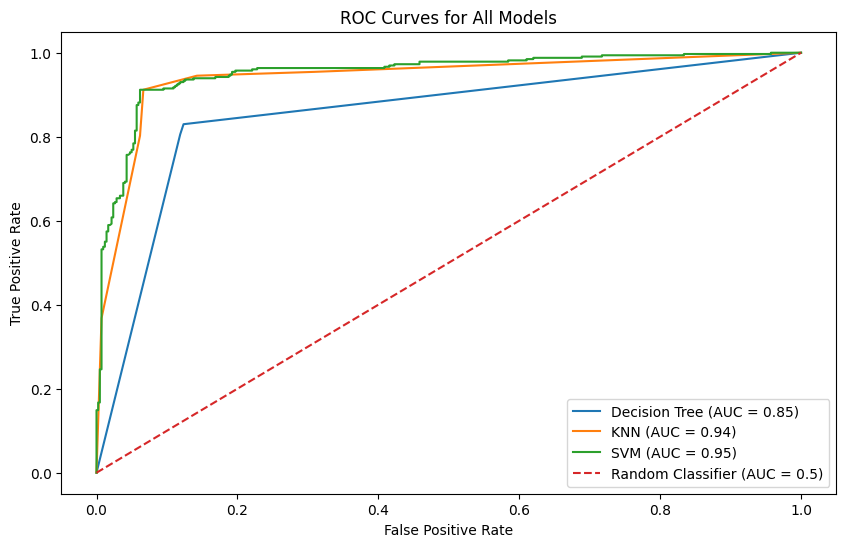

In [ ]:
#  Plot ROC curves for all models.
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for each model
y_prob_tree = dtree.predict_proba(X_test_enc)[:, 1]  # Only for class 1
y_prob_knn = knn.predict_proba(X_test_enc)[:, 1]
y_prob_svm = svm_rbf.decision_function(X_test_enc)
y_prob_svm = (y_prob_svm - y_prob_svm.min()) / (y_prob_svm.max() - y_prob_svm.min())  # Scale to [0, 1]

# Compute ROC curve for each model
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc(fpr_tree, tpr_tree):.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc(fpr_knn, tpr_knn):.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc(fpr_svm, tpr_svm):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Calculate and compare AUC scores.
auc_tree = auc(fpr_tree, tpr_tree)
auc_knn = auc(fpr_knn, tpr_knn)
auc_svm = auc(fpr_svm, tpr_svm)

print(f"Decision Tree AUC: {auc_tree:.4f}")
print(f"KNN AUC: {auc_knn:.4f}")
print(f"SVM AUC: {auc_svm:.4f}")

Decision Tree AUC: 0.8536
KNN AUC: 0.9413
SVM AUC: 0.9525


In [ ]:
# Choose the best model and justify your choice.
# Example justification based on AUC scores
best_model = "SVM" if auc_svm > max(auc_tree, auc_knn) else "Decision Tree" if auc_tree > auc_knn else "KNN"
print(f"Based on AUC, the best model is: {best_model}.")

Based on AUC, the best model is: SVM.


## Section 7: Hyperparameter Tuning with GridSearchCV

In [ ]:
# Define parameter grids for at least two models (e.g., max_depth, C, gamma).
from sklearn.model_selection import GridSearchCV

# Parameter grid for Decision Tree
param_grid_dtree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

In [ ]:
# Run GridSearchCV with 5-fold CV on training data.
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create the Decision Tree and SVM models
dtree = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)

# Perform GridSearchCV for Decision Tree
grid_search_dtree = GridSearchCV(dtree, param_grid_dtree, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dtree.fit(X_train_enc, y_train)

# Perform GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_enc, y_train)

,estimator,SVC(random_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [0.01, 0.1, ...], 'kernel': ['rbf', 'linear']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.1


In [ ]:
# Report best parameters and best score.
# Report best parameters and best score for Decision Tree
print("Best parameters for Decision Tree:", grid_search_dtree.best_params_)
print("Best score for Decision Tree:", grid_search_dtree.best_score_)

# Report best parameters and best score for SVM
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best score for SVM:", grid_search_svm.best_score_)


Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree: 0.9273434302087598
Best parameters for SVM: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score for SVM: 0.9273434302087598


In [ ]:
# Evaluate the best estimator on the test set.
# Evaluate the best Decision Tree model on the test set
best_dtree = grid_search_dtree.best_estimator_
y_pred_dtree = best_dtree.predict(X_test_enc)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Test accuracy for Decision Tree: {accuracy_dtree:.4f}")

# Evaluate the best SVM model on the test set
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_enc)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Test accuracy for SVM: {accuracy_svm:.4f}")

Test accuracy for Decision Tree: 0.9227
Test accuracy for SVM: 0.9253


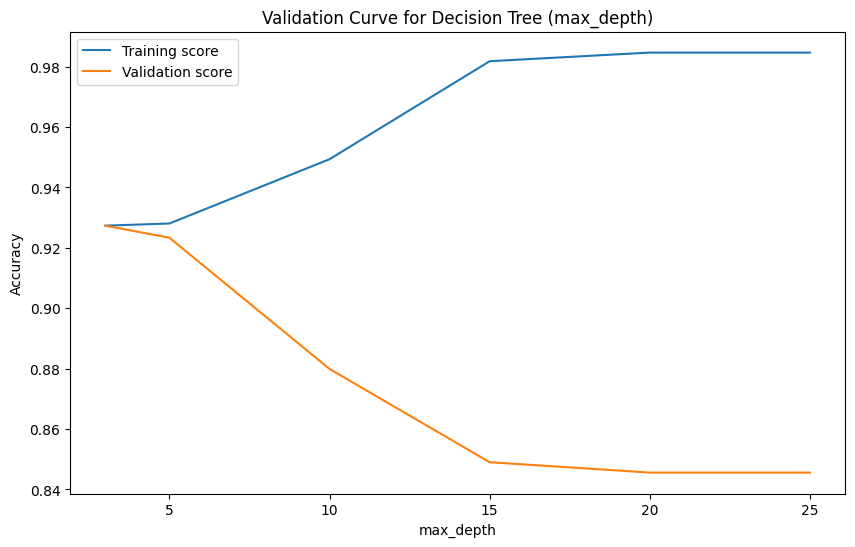

In [ ]:
# Plot validation curves to visualize how tuning affected performance.
from sklearn.model_selection import validation_curve

# Decision Tree: tuning 'max_depth'
param_range_dtree = [3, 5, 10, 15, 20, 25]
train_scores_dtree, test_scores_dtree = validation_curve(
    DecisionTreeClassifier(random_state=42),
    X_train_enc, y_train, param_name="max_depth", param_range=param_range_dtree,
    cv=5, scoring="accuracy", n_jobs=-1
)

# Plot validation curve for Decision Tree
plt.figure(figsize=(10, 6))
plt.plot(param_range_dtree, np.mean(train_scores_dtree, axis=1), label="Training score")
plt.plot(param_range_dtree, np.mean(test_scores_dtree, axis=1), label="Validation score")
plt.title("Validation Curve for Decision Tree (max_depth)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()